Task-1

In [12]:
import cv2
import numpy as np

# Loading and resizing the image
image = cv2.imread("cj-greenscreen.webp")
resized_image = cv2.resize(image, (640, 480))

# Setting brightness and contrast by scaling the pixel values
alpha = 4.5
beta = 10

# Function for blending
goodboy_cj = cv2.convertScaleAbs(resized_image, alpha=alpha, beta=beta)

# Displaying image
final = cv2.add(resized_image, goodboy_cj)
combined = np.hstack((resized_image, goodboy_cj))

cv2.imshow("Original and edited", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

Task 2

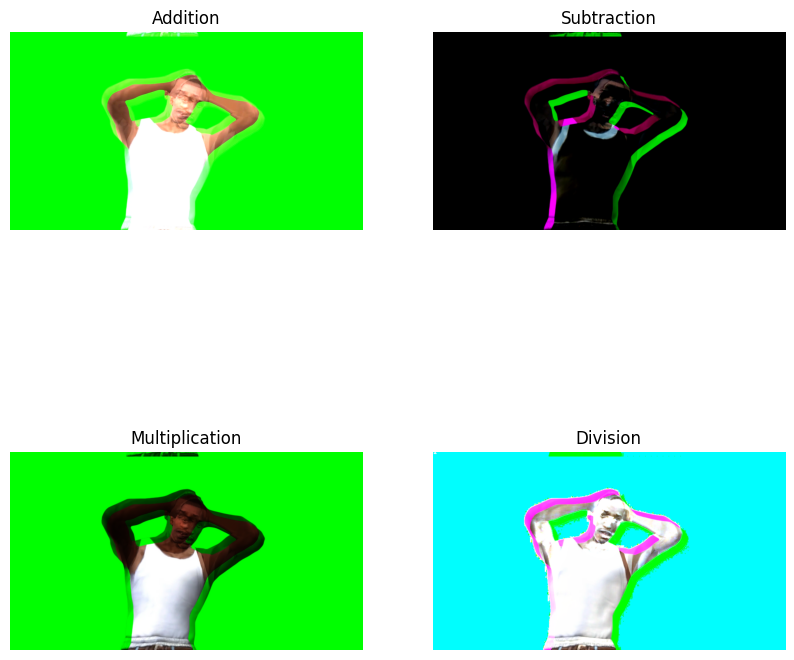

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("cj-greenscreen.webp")

# Convert BGR to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a second image by shifting the original image for demonstration
image2 = np.roll(image_rgb, shift=30, axis=(0, 1))  # Shifted by 30 pixels

# 1. Addition
addition_result = cv2.add(image_rgb, image2)

# 2. Subtraction
subtraction_result = cv2.subtract(image_rgb, image2)

# 3. Multiplication (element-wise multiplication)
multiplication_result = np.clip((image_rgb / 255.0) * (image2 / 255.0) * 255, 0, 255).astype(np.uint8)

# 4. Division (element-wise division with small epsilon to avoid division by zero)
division_result = np.clip(np.divide(image_rgb, image2 + 1e-5) * 255, 0, 255).astype(np.uint8)

# Display the results using Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(addition_result)
axs[0, 0].set_title('Addition')
axs[0, 0].axis('off')

axs[0, 1].imshow(subtraction_result)
axs[0, 1].set_title('Subtraction')
axs[0, 1].axis('off')

axs[1, 0].imshow(multiplication_result)
axs[1, 0].set_title('Multiplication')
axs[1, 0].axis('off')

axs[1, 1].imshow(division_result)
axs[1, 1].set_title('Division')
axs[1, 1].axis('off')

# combined = np.hstack((addition_result, subtraction_result, multiplication_result, division_result))

# cv2.imshow("results",combined)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.show()


Task-3

In [11]:
import cv2
import numpy as np

subject = cv2.imread("cj-greenscreen.webp")
background = cv2.imread("cj-hosue.webp")

# Resizing
frame = cv2.resize(subject, (640, 480))
image = cv2.resize(background, (640, 480))

# Adjusted green color range
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

# Converting the frame to HSV color space for better color detection
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_green, upper_green)

# Improve the mask using morphological operations
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3, 3), np.uint8))

# Create the inverse mask
mask_inv = cv2.bitwise_not(mask)

# Use the mask to extract the foreground (original frame) and the background (replacement image)
fg = cv2.bitwise_and(frame, frame, mask=mask_inv)
bg = cv2.bitwise_and(image, image, mask=mask)

# Combine the foreground and background
final = cv2.add(fg, bg)

# Concatenate the original frame and the final output side by side
combined = np.hstack((frame, final))

cv2.imshow("Original and edited", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

Task 4

In [1]:
import cv2
import numpy as np

# Load the two frames
frame1 = cv2.imread('Picture1.png')  # Load first frame
frame2 = cv2.imread('Picture2.png')  # Load second frame

# Convert the frames to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Compute the absolute difference between the two frames
diff = cv2.absdiff(gray1, gray2)

# Apply a binary threshold to the difference image to highlight moving regions
_, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

# Dilate the thresholded image to make the differences more prominent
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=2)

# Find contours to highlight moving objects
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around moving objects
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter out small movements
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the frames with detected movement
cv2.imshow('Motion Detection', frame1)

# Wait and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()
